# 同花顺行业概念信息

In [75]:

import pandas as pd

fpath = r'../../JohnsonUtil\wencai\同花顺板块行业.xls'
thsgn = pd.read_excel(fpath)
thsgn = thsgn.set_index('股票代码')

## 查询信息

In [76]:
thsgn[:1]
thsgn.columns
thsgn.loc['002670.SZ']

,股票简称,现价(元),涨跌幅(%),主营产品名称,所属概念,所属同花顺行业,经营范围,公司网站,所属概念数量(个),a股流通市值 (元)2023.01.31
股票代码,,,,,,,,,,
605128.SH,上海沿浦,54.99,-0.92,座椅骨架总成||座椅滑轨||座椅骨架配件||锁闭系统配件||安全系统零件||注塑零部件||模...,高铁;新能源汽车,交运设备-汽车零部件-汽车零部件Ⅲ,电动座椅骨架总成、汽车座椅骨架及总成、汽车零部件、五金冲压件、钣金件、模具的加工、生产及销售...,www.shyanpu.com,2,2293632900


Index(['股票简称', '现价(元)', '涨跌幅(%)', '主营产品名称', '所属概念', '所属同花顺行业', '经营范围', '公司网站',
       '所属概念数量(个)', 'a股流通市值 (元)2023.01.31'],
      dtype='object')

股票简称                                                                 国盛金控
现价(元)                                                                9.46
涨跌幅(%)                                                               0.96
主营产品名称                  电源输入组件||电热电器电源输入组件||冰洗电器电源输入组件||空调电源输入组件||空调连接...
所属概念                    深股通;区块链;转融券标的;富时罗素概念;富时罗素概念股;消费金融;标普道琼斯A股;融资融券...
所属同花顺行业                                                       非银金融-证券-证券Ⅲ
经营范围                    控股公司服务，股权投资，投资管理与咨询；金融信息服务；科技中介服务，技术推广服务，软件开发，...
公司网站                                                       www.gsfins.com
所属概念数量(个)                                                              11
a股流通市值 (元)2023.01.31                                          15356897000
Name: 002670.SZ, dtype: object

# Debug开启

In [77]:

# Delete Jupyter notebook root logger handler
# Set Debug
import logging
import sys

# %matplotlib inline
%matplotlib widget
# stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# # # reload(sys)
# # # sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# stdout = sys.stdout
# sys.path.append('../')
# import JSONData.tdx_data_Day as tdd
# sys.stdout = stdout


mylogger = logging.getLogger()
if len(mylogger.handlers) > 0:
    for ix in mylogger.handlers:
        print("handlers:%s std:%s" % (ix.stream, sys.stdout))
else:
    print("nb not handlers")
#     mylogger.propagate = False
mylogger.setLevel(logging.ERROR)
# mylogger.setLevel(logging.DEBUG)

print("nb:", sys.stderr)
# # Create logger as usual
import nest_asyncio

nest_asyncio.apply()

handlers:<ipykernel.iostream.OutStream object at 0x0000016CE9A5E5B0> std:<ipykernel.iostream.OutStream object at 0x0000016CE9A5E5E0>
handlers:<_io.TextIOWrapper name='G:\\stock.log.2023-02-06.log' mode='a+' encoding='cp936'> std:<ipykernel.iostream.OutStream object at 0x0000016CE9A5E5E0>
nb: <ipykernel.iostream.OutStream object at 0x0000016CE9A5E5B0>


# TDX多日数据分析

## 定义 TDX-Path

In [78]:
# encoding:utf-8
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

import sys

import pandas as pd
from pandas import HDFStore

stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# print(stdi, stdo, stde)
# reload(sys)
# sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# print(sys.stdout,sys.stderr,sys.stderr)

# print(stdi, stdo, stde)

# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

In [79]:
sys.path.append("../../")
import os

import JSONData.tdx_data_Day as tdd
# import win_unicode_console
from JohnsonUtil import commonTips as cct
from JSONData import sina_data

os.environ['NUMEXPR_MAX_THREADS'] = '12'

# import nest_asyncio
# nest_asyncio.apply()
# 查阅资料后发现，发现使用 jupyter notebook 环境，其连接着 IPython 内核，而 IPython 内核本身在事件循环上运行，而 asyncio 不允许嵌套其事件​​循环，因此会出现如上图的错误信息。
# nest_asyncio 作为异步操作的补丁而存在，具体内容请参考
# win_unicode_console.disable()
tdx_path = "G:\\tdx_last_df.h5"
sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
sina_d_path = "G:\\sina_data.h5"
sina_dd_path = "G:\\get_sina_all_dd.h5"
# print(stdi, stdo, stde)
sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# # 显示所有列
pd.set_option("display.max_columns", None)
# # 显示所有行
# pd.set_option('display.max_rows', None)
# # 设置 value 的显示长度为 100，默认为 50
# pd.set_option('max_colwidth',100)
# pd.set_option?
# df.columns.tolist()

In [80]:
cct.code_to_symbol_ths('000002')

'000002.SZ'

### 功能定义

In [81]:
def apply_col_toint(df, col=None):
    if col is None:
        co2int = ['boll', 'op', 'ratio', 'fib', 'fibl', 'df2']
    # co2int.extend([co for co in df.columns.tolist()
    #                if co.startswith('perc') and co.endswith('d')])
        co2int.extend(['top10', 'topR'])
    else:
        co2int = col
    co2int = [inx for inx in co2int if inx in df.columns]

    for co in co2int:
        df[co] = df[co].astype(int)

    return df


def readHdf5(fpath, root=None):
    store = pd.HDFStore(fpath, "r")
    print(store.keys())
    if root is None:
        root = store.keys()[0].replace("/", "")
    df = store[root]
    df = apply_col_toint(df)
    store.close()
    return df


def write_code_to_blk(codew, blk='090'):
    block_path = tdd.get_tdx_dir_blocknew() + '%s.blk' % (blk)
    write_blk = 'n'
    write_blk = cct.cct_raw_input("write blk [Y] or [N]:")
    if write_blk == 'y' or write_blk == 'Y':
        hdf5_wri = cct.cct_raw_input(
            "Rewrite code [Y] or append [N](defalut:N):")
        if hdf5_wri == 'y' or hdf5_wri == 'Y':
            append_status = False
        else:
            append_status = True
        if len(codew) > 3:
            cct.write_to_blocknew(block_path, codew, append_status,
                                  doubleFile=False, keep_last=0)
            ("write:%s block_path:%s" % (len(codew), block_path))
        else:
            ("write error:%s block_path:%s" % (len(codew), block_path))


def show_tdx_data(df, codelist=None, market_value='3', col=None):

    columns_ = [
        "name", "category", "close", "percent", 'topR', "lastp1d", "ma5dcum",
        "ma20d", "fib", "fibl", "ra", "ral", "df2", "per1d", "hmax", "lmin",
        "per%sd" % (market_value),
        "perc%sd" % (market_value)]
    if col is not None:
        columns_.insert(4, col)

    if codelist is None:
        if isinstance(df, pd.Series):
            print("Count:1")
            temp = df.loc[columns_]
        else:
            print("Count:%s %s" % (df.shape))
            temp = df.loc[:, columns_]
    else:
        temp = df.loc[[x for x in codelist if x in df.index], columns_]
    return temp


def compute_perd_value(df, market_value=3, col="per"):

    # if market_value == None or market_value < "2":
    #     market_value = 3
    # if market_value > 1 and len(df[ df["%s%sd" % (col, market_value)] > 2])   :
    market_value = str(market_value)
    if market_value > str(1):
        temp = df[
            df.columns[
                (df.columns >= "%s1d" % (col))
                & (df.columns <= "%s%sd" % (col, market_value))
            ]
        ]

        df['%s%sd' % (col, market_value)] = temp.T.sum().apply(
            lambda x: round(x, 1))
    else:
        print("market_value <= 1,No Compute")

    return df


def clean_688(df):
    df = df[(~df.index.str.contains("688"))]
    return df


from collections import Counter, OrderedDict


def counterCategory(df):
    top5 = dict()
    if len(df) > 0:
        categoryl = df.category[:20].tolist()
        dicSort = []
        for i in categoryl:
            if isinstance(i, str):
                # dicSort.extend([ co.decode('utf8') for co in i.split(';')])
                dicSort.extend(i.split(';'))
                # cate_list = i.split(';')
                # for co in cate_list:
                #     dicSort.append(to_str(co))
        topSort = Counter(dicSort)
        top5 = OrderedDict(topSort.most_common(5))
        # for i in top5.keys():
        # print(i, top5[i]),
        # print('')
    return top5


def get_runtime_percent(df, perd=None):
    if "percent" not in df.columns and "lastp1d" in df.columns:
        # print('init percent')
        df = df.fillna(0)
        df['percent'] = list(
            map(
                lambda x, y, z: round((x - y) / y * 100, 1)
                if x != y else round((x - z) / z * 100, 1),
                df.close, df.lastp1d, df.lastp2d))
        # df['percent'] = df.apply(lambda x: round((x.close - x.lastp1d) /(x.lastp1d) * 100, 1),axis=1)
    # else:
    #     print('Percent in columns')
    if not perd is None:
        df[perd] = list(map(lambda x, y: round((x + y), 1)
                            if int(y) > 0 else 0, df.perd, df.percent))
    return df


def get_realtime_ratio(df, market='all'):
    if 'ratio' in df.columns:
        df.drop('ratio', axis=1, inplace=True)
    ratio_df = tdd.getSinaJsondf(market)
    df = cct.combine_dataFrame(
        df, ratio_df.ratio, col=None, compare=None, append=False, clean=False)
    return df


def get_ths_info(code):
    code = cct.code_to_symbol_ths(code)
    return thsgn.loc[code]

### 还原Cell输出信息

In [82]:
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

## 初始化 hdf5的tdx数据

In [83]:

market_value = "3"
df = readHdf5(tdx_path)
df = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
df = compute_perd_value(df, market_value, "perc")
df = compute_perd_value(df, market_value, "per")

df = get_realtime_ratio(df)
# df=get_runtime_percent(df)

df = get_runtime_percent(df, "per%sd" % (market_value))

# filter 科创
df = clean_688(df)

df.shape
df[-1:].percent
df[~(df.last6vol > 0)][:10].last6vol
df.ratio[-2:]

['/low_d_60_y_all', '/low_w_180_y_all']


(4447, 119)

code
600820    0.6
Name: percent, dtype: float64

Series([], Name: last6vol, dtype: float64)

code
601515    0.3
600820    0.2
Name: ratio, dtype: float64

## 个股数据查看

In [84]:
df.ma203d[:1]
# df.loc['003042'].loc[["category", "close"]]

code
999999    3183.03
Name: ma203d, dtype: float64

In [85]:
show_tdx_data(df.loc['003042'])
get_ths_info('003042')

Count:1


name                  中农联合
category    新股与次新股 ;核准制次新股
close                30.91
percent                6.6
topR                     0
lastp1d              28.99
ma5dcum               25.5
ma20d                26.41
fib                     27
fibl                     9
ra                     0.0
ral                  -24.1
df2                      3
per1d                 10.0
hmax                  35.0
lmin                 24.63
per3d                 16.6
perc3d                 3.1
Name: 003042, dtype: object

股票简称                                                                 中农联合
现价(元)                                                               26.24
涨跌幅(%)                                                               0.92
主营产品名称                  吡虫啉||啶虫脒||烯啶虫胺||哒螨灵||低毒农药原药及其中间体||杀虫剂||杀菌剂||除草...
所属概念                                                  草甘膦;乡村振兴;中俄贸易概念;供销社
所属同花顺行业                                                      基础化工-化学制品-农药
经营范围                    生物、化学农药、化工产品及仪器仪表的技术开发、技术转让、技术咨询服务；农药（不含化学危险品）...
公司网站                                                       www.sdznlh.com
所属概念数量(个)                                                               4
a股流通市值 (元)2023.01.31                                           1787252200
Name: 003042.SZ, dtype: object

In [86]:
# df[(df.close > df.ma20d * 0.99) & (df.close < df.ma20d * 1.05)]

def filter_ma_range_df(df, ma='20', days='3'):
    dd = []
    for da in range(int(days), 0, -1):
        # print(da, ma)
        # df1 = df[ (df['lastp%sd'%(da)] > df['ma%s%sd'%(ma,da)]) & (df['lastp%sd'%(days)] < df['ma%s%sd'%(ma,da)] * 1.1)]
        df1 = df[(df['lastp%sd' % (da)] > df['ma%s%sd' % (ma, da)] * 0.99)]
        if da == days:
            dd = df1.index.tolist()
        else:
            dd = [x for x in dd if x in df1.index]

    return [x for x in set(dd)]


def get_union_list(maind, subd):
    # 筛选Main存在后切在新Sub出现
    return [x for x in maind if x in subd]

### 新农联合筛选

In [87]:
code_fs = '003042'
# show_tdx_data(df.loc['003042'])
# get_ths_info('003042')

df_f_t = df[(df.fib < 30) & (df.fibl > 6) & (df.df2 > 2) & (df.ral < -15) &
            (df.close >= df.ma5dcum) & (df.perc3d > 1.1) & (df.lastv1d > df.lastv2d) & (df.close > df.ma5d) ]

df_f_t.shape
df_f_t.loc[code_fs][:1]
show_tdx_data(df_f_t)[:5]


(15, 119)

lopen    25.3
Name: 003042, dtype: object

Count:15 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
301396,宏景科技,0,44.24,-0.2,0,44.34,38.3,37.58,20,9,0.0,-26.1,6,5.0,50.01,35.03,0.0,3.2
300820,英杰电气,新股与次新股 ;非科创次新股,96.98,5.8,1,91.66,81.7,80.90,24,9,0.0,-23.6,5,0.4,116.66,72.00,6.2,3.1
300535,达威股份,高送转,14.34,2.1,0,14.04,13.5,13.39,21,9,0.0,-17.4,3,-0.4,16.85,13.00,1.7,3.2
000820,神雾节能,固废处理;节能环保,4.99,-1.8,1,5.08,4.7,4.72,21,9,0.0,-16.0,3,4.1,5.75,4.46,0.0,3.2
002306,中科云网,春节概念;ST板块;收入改革,4.65,-2.5,0,4.77,4.5,4.63,25,7,0.0,-17.3,6,5.1,5.31,4.32,0.0,3.1


#### 写入069

In [88]:
# write_code_to_blk(df_f_t.index, '069')

In [89]:
df_ma26d = filter_ma_range_df(df, ma=20, days=5)
# 连续3日在生命线上
# df_ma26d = df[(df.fibl > 1) & (df.ra > 5)]
len(df_ma26d)
df_ma5d = filter_ma_range_df(df, ma=5, days=5)

# 连续3日在生命线上
len(df_ma5d)
df_x = get_union_list(df_ma26d, df_ma5d)
df_5dx_20d = get_union_list(df_x, df[df.ma5d < df.ma20d].index)

show_tdx_data(df.loc[df_5dx_20d])

3779

3361

Count:17 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
603227,雪峰科技,新疆振兴,9.25,-0.1,-1,9.26,9.2,9.20,25,7,0.0,-9.5,4,0.7,10.19,8.42,0.0,3.2
601398,工商银行,MSCI概念;优先股概念;外汇,4.30,0.0,0,4.30,4.3,4.32,59,1,2.0,-1.8,0,0.0,4.36,4.30,0.0,0.0
603630,拉芳家化,二胎概念;电子商务,14.78,-0.9,0,14.91,14.8,14.99,33,7,0.0,-8.4,1,-0.1,15.69,14.34,0.0,3.0
600789,鲁抗医药,禽流感;兽药;医保,6.84,-1.0,0,6.84,6.8,6.88,23,8,0.0,-14.3,2,-1.0,7.64,6.62,0.0,3.0
002039,黔源电力,央企控股;央企国资改革;西电东,14.60,-1.4,0,14.81,14.8,14.92,49,6,0.0,-4.5,0,-0.9,15.22,14.23,0.0,3.0
605599,菜百股份,地方国资改革 ;核准制次新股,9.94,-1.0,0,10.04,10.1,10.13,47,8,2.0,-7.6,0,-1.3,10.64,9.90,0.0,3.0
601366,利群股份,互联网平台;腾讯概念,5.99,-0.3,0,5.99,6.0,6.05,56,9,0.0,-5.4,0,-0.3,6.26,5.90,0.0,3.1
001299,美能能源,0,20.11,-1.2,1,20.36,20.3,20.51,59,7,0.0,-31.2,4,-0.1,27.58,19.62,0.0,3.1
001896,豫能控股,地方国资改革;电力改革;新能源,5.15,0.4,0,5.13,5.1,5.17,25,7,0.0,-13.5,1,-1.0,5.73,5.01,0.0,3.2


In [90]:
df.loc[["603068", '601377', '000725'],
       ["date", "name", "category", "percent", "close", "lastp1d", "ma5d",
        "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
        "ra", "ral", "vcall", "vcra", "vchange", "lvol", 'lv', 'lowvol',
        'last6vol', 'per%sd' % (market_value),
        'perc%sd' % (market_value),
        'perc4d']][: 3]

,date,name,category,percent,close,lastp1d,ma5d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,vcall,vcra,vchange,lvol,lv,lowvol,last6vol,per3d,perc3d,perc4d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,
603068,2022-11-10,博通集成,新股与次新股,-1.2,32.26,32.65,32.09,31.1,30.30,54,9,7,0.9,34.56,28.21,0.0,-9.0,430.4,2.0,-25.4,4472441.0,1506600.0,2213052.0,3882000.0,0.0,3.1,0.9
601377,2022-11-09,兴业证券,参股新三板;MSCI概念;融资,-2.4,6.54,6.70,6.85,6.8,6.44,56,1,8,-1.2,6.48,6.48,3.0,-5.6,373.1,4.0,-44.1,99362847.0,21547268.0,29337625.0,88737321.0,0.0,1.9,1.0
000725,2022-12-29,京东方Ａ,国开行;物联网;OLED,0.2,4.02,4.01,4.03,4.0,3.79,21,9,4,0.0,3.76,3.75,0.0,-2.9,165.0,3.0,9.1,331273641.0,90156798.0,146636206.0,303765163.0,0.0,3.1,0.9


In [91]:

sort_key2 = "per%sd" % (market_value)
df = df.sort_values(
    by=["perc%sd" % (market_value), sort_key2, "fib"], ascending=[0, 0, 1]
)
show_tdx_data(df)[: 5]

show_tdx_data(df)[-5:]
# df = df.sort_values(by=['perc%sd'%(market_value), 'per%sd'%(market_value),'fib'],ascending=[0,0,1])

Count:4447 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
603660,苏州科达,人脸识别;安防;感知层,7.02,10.0,0,6.38,5.4,5.46,22,9,0.0,-4.8,1,10.0,6.22,5.15,20.0,3.3
002362,汉王科技,虹膜识别;指纹技术;电子纸,29.66,10.0,5,26.96,18.2,18.15,47,8,0.0,10.0,14,10.0,21.27,16.25,20.0,3.3
002347,泰尔股份,3D打印;锂电池;工业4.0,7.08,9.9,2,6.44,5.1,4.97,21,9,0.0,10.1,3,10.0,5.31,4.81,19.9,3.3
002167,东方锆业,稀有金属;央企国资改革;中澳自,9.27,5.3,2,8.80,6.4,6.44,44,9,0.0,10.0,3,10.0,6.29,6.06,15.3,3.3
001223,欧克科技,0,102.50,6.6,1,96.11,79.4,76.14,24,4,0.0,1.8,14,6.7,79.72,74.48,13.3,3.3


Count:4447 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
002089,*ST新海,云服务;军民融合;华为概念,1.35,-4.9,-8,1.42,1.9,1.98,2,1,10.0,-46.6,0,-4.7,2.56,1.49,0.0,-3.3
600311,*ST荣华,兰新白试验区;淀粉;白银,0.94,-9.6,-3,1.04,1.2,1.18,18,1,3.0,-35.4,0,-4.6,1.60,1.09,0.0,-3.3
002417,*ST深南,流媒体;移动互联网;5G,5.11,-5.0,-5,5.38,6.2,6.36,22,1,4.0,-40.5,0,-4.9,8.93,5.66,0.0,-3.3
600146,退市环球,基因测序;她经济;互联网金融,0.22,-91.0,-7,2.44,3.1,3.31,45,1,10.0,-39.3,26,-5.1,3.92,2.57,0.0,-3.3
002052,*ST同洲,智能交通;股权转让;卫星导航,1.82,4.0,-3,1.75,2.1,2.28,2,1,4.0,-43.4,8,-4.4,2.99,1.83,-0.4,-3.3


## filter 20D 涨幅榜 

In [92]:
# df = df[(df['close'] > df['ma20d'] * 0.98) & (df['close'] < df['ma20d'] * 1.03)]
f20df = df[(df['close'] > df['ma20d'] * 0.98)
           & (df['df2'] > 0) & (df['lastp1d'] > df['ma5d']) & (df['lasth1d'] >= df['lasth2d']) ]

f20df.shape
show_tdx_data(f20df)[: 3]
show_tdx_data(f20df)[-3:]

(574, 119)

Count:574 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
603660,苏州科达,人脸识别;安防;感知层,7.02,10.0,0,6.38,5.4,5.46,22,9,0.0,-4.8,1,10.0,6.22,5.15,20.0,3.3
002362,汉王科技,虹膜识别;指纹技术;电子纸,29.66,10.0,5,26.96,18.2,18.15,47,8,0.0,10.0,14,10.0,21.27,16.25,20.0,3.3
002347,泰尔股份,3D打印;锂电池;工业4.0,7.08,9.9,2,6.44,5.1,4.97,21,9,0.0,10.1,3,10.0,5.31,4.81,19.9,3.3


Count:574 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
002798,帝欧家居,参股新三板;高送转,8.38,6.8,0,8.38,8.2,8.20,58,4,0.0,-5.3,1,6.8,8.63,7.77,13.6,1.0
002159,三特索道,中部崛起;收入改革,15.83,7.0,0,14.80,15.0,15.75,58,6,0.0,-21.7,12,3.4,17.76,14.25,10.4,0.9
603444,吉比特,手机游戏;沪股通;网络游戏,363.11,2.1,0,355.65,358.1,352.97,59,3,8.0,-4.1,5,1.4,364.58,345.50,3.5,0.9


In [93]:

sort_key2 = "per%sd" % (market_value)

f20df = f20df.sort_values(
    by=[sort_key2, "perc%sd" % (market_value), "fib"], ascending=[0, 0, 1]
)
f20df.shape
show_tdx_data(f20df)[: 5]

show_tdx_data(f20df)[-5:]


# df.loc[:, ["name"]].T

(574, 119)

Count:574 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
300114,中航电测,军民融合;央企国资改革;仪电仪,18.29,20.0,2,15.24,10.7,10.75,15,9,0.0,20.0,2,10.0,11.28,10.18,30.0,3.2
300089,*ST文化,手机游戏;在线教育;K12教育,2.63,15.4,0,2.28,1.7,1.88,7,7,0.0,-39.8,3,10.0,3.65,1.38,25.4,3.1
300339,润和软件,SAAS;阿里巴巴概念;手机游,27.01,16.4,1,23.21,20.3,20.14,25,8,0.0,-0.0,2,4.2,21.71,19.26,20.6,3.2
002354,天娱数科,MSCI潜力股;电子竞技;东北,5.56,10.1,1,5.05,4.2,4.19,59,9,0.0,3.3,4,10.0,4.75,3.96,20.1,3.2
603660,苏州科达,人脸识别;安防;感知层,7.02,10.0,0,6.38,5.4,5.46,22,9,0.0,-4.8,1,10.0,6.22,5.15,20.0,3.3


Count:574 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,
603171,税友股份,大数据 ;蚂蚁金服概念 ;新股,39.53,-4.9,0,41.55,40.2,40.32,59,1,0.0,-4.6,5,6.3,42.65,39.00,0.0,2.0
603156,养元饮品,新股与次新股,21.27,0.2,0,21.22,21.4,21.43,58,3,0.0,-6.5,2,0.0,22.55,20.80,0.0,1.9
301002,崧盛股份,融资融券 ;转融券标的 ;新股,23.87,1.0,0,23.63,23.1,22.79,44,6,0.0,-6.5,5,-1.3,24.41,21.34,-0.3,3.2
000560,我爱我家,新零售;电子商务;深股通,3.02,1.3,0,2.98,2.7,2.68,59,8,0.0,-3.6,4,-1.7,2.96,2.59,-0.4,3.1
603779,威龙股份,葡萄酒替白酒;贸易战受益股,7.44,1.8,0,7.31,6.4,6.53,7,7,0.0,-5.7,3,-3.8,6.93,6.05,-2.0,3.2


In [94]:
code = ["000725"]
f20df.loc[code,
          ["name", "close", "percent", "lastp1d", "ma5dcum", "ma20d", "fib",
           "fibl", "ra", "df2", "per1d", "hmax", "lmin", "per%sd" %
           (market_value),
              "perc%sd" % (market_value)]]

KeyError: "None of [Index(['000725'], dtype='object', name='code')] are in the [index]"

## Write code to blk 

In [95]:


# codew = df.index.tolist()
# write_code_to_blk(codew)

# TDX参数数据信息

In [96]:
# code = '002670'
# tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# tdf.dropna(inplace=True)
# tdf.loc[:, ["close", "ma5d", "ma10d",
#             "ma20d", "upper", "lower", "hmax", "lmin"]].plot()
# tdf = compute_perd_value(tdf, market_value, "per")

# 实时sina_MultiIndex 分析

## 初始化当日Multi

In [97]:
# ohlc_dict = {'open': 'first',
#              'high': 'max',
#              'low': 'min',
#              'close': 'last'}

ohlc_dict = {
    'volume': 'sum',
    'high': 'max',
    'low': 'min',
    'close': 'last'}


def minmax_norm(df):
    return ((df - df.min()) / (df.max() - df.min())).apply(lambda x: round(x, 2))

# def apply_round(df):
#     return df.apply(lambda x:round(x,2))


import pandas as pd
from pandas import HDFStore

# sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
# freq='30T'
# startime = '09:25:00'
# endtime = '15:01:00'
# def readHdf5(fpath, root=None):
#     store = pd.HDFStore(fpath, "r")
#     print((store.keys()))
#     if root is None:
#         root = list(store.keys())[0].replace("/", "")
#     df = store[root]
#     store.close()
#     return df

h5 = readHdf5(sina_MultiD_path)
print(sina_MultiD_path)
h5.shape
# h5[:1]
code_muti = '600519'
h5.loc[code_muti][:2]
h5.loc[code_muti][-1:]

['/all_10']
G:\sina_MultiIndex_data.h5


(653788, 6)

,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-02-06 09:25:33,1780.00,1780.0,1780.0,1818.0,95200,1780.0
2023-02-06 09:30:37,1770.45,1781.0,1770.0,1818.0,284381,1780.0


,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-02-06 10:42:01,1793.55,1794.94,1760.0,1818.0,2478725,1788.28


## Now freq = 'D' 总量占比

In [98]:
# h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
# h5_ohlc_Day = h5_ohlc.groupby(pd.Grouper(
#     freq='1D', closed='right', label='right')).agg(
#     ohlc_dict).dropna()
# freq = '30T'
freq = 'D'
startime = '09:25:00'
endtime = '15:01:00'

time_ratio = cct.get_work_time_ratio()

run_col = ['close', 'volume']
mdf = cct.get_limit_multiIndex_freq(
    h5, freq=freq.upper(),
    col=run_col, start=startime, end=endtime, code=None)
allvol = mdf.volume.sum()
allvol / 1000 / 1000 / 1000
mdf.loc['002195'].volume / mdf.loc['600705'].volume
ndf = mdf.copy()
ndf.info(show_counts=True)
ndf.describe()

3053.292121038

ticktime
2023-02-07    0.526321
Freq: D, Name: volume, dtype: float64

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4917 entries, ('000001', Timestamp('2023-02-07 00:00:00', freq='D')) to ('689009', Timestamp('2023-02-07 00:00:00', freq='D'))
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4917 non-null   float64
 1   volume  4917 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 258.8+ KB


,close,volume
count,4917.000000,4.917000e+03
mean,29.220914,6.209665e+08
std,211.771131,1.426156e+09
min,0.000000,0.000000e+00
25%,6.900000,8.490646e+07
50%,13.345379,2.257223e+08
75%,26.428864,5.887862e+08
max,11918.432000,2.811310e+10


### TDX filter Vol and fibl

####  9日交易量nvol_idx 

In [99]:
# 9日交易量Mean
temp = df[df.columns[((df.columns >= 'lastv1d') & (df.columns <= 'lastv9d'))]]
temp.shape, temp.columns
temp['volmean'] = temp.mean(axis=1)
# temp[:1]
temp['volnow'] = round(temp['lastv1d'] / temp['volmean'], 2)
nvol_idx = temp.sort_values(by=['volnow'], ascending=[0])
# nvol_idx.index
nvol_idx.loc[:, ['volnow']].T[:20]
df = get_realtime_ratio(df)

show_tdx_data(df, nvol_idx.index[:20], col='ratio').T
nvol_idx.shape

((4447, 9),
 Index(['lastv1d', 'lastv2d', 'lastv3d', 'lastv4d', 'lastv5d', 'lastv6d',
        'lastv7d', 'lastv8d', 'lastv9d'],
       dtype='object'))

code,002835,002122,300096,002097,000509,601999,300840,600240,002842,002167,603500,300571,002795,002117,300272,300135,002798,301259,000710,603983,003013,300293,001266,300414,000816,300309,301289,301085,002209,300160,002806,600651,300079,002052,600063,002613,003036,301178,002641,600106,002769,300250,300758,300045,603050,301207,603798,300394,300773,300553,603711,600162,000409,002306,002889,300134,301083,603177,002947,002845,000886,000601,300512,600736,603663,002757,300287,301093,300213,300211,300848,603687,002199,000820,300971,301183,603106,002758,300781,301115,300608,002216,603970,600229,002281,603606,300387,605300,002767,002348,002549,300473,605338,002064,002803,603217,300209,301195,300846,603059,002536,300322,000410,000722,600084,603686,603186,603507,002362,601258,600819,002197,300141,000856,600122,605006,600847,003042,605089,600381,002378,301288,300302,300983,300155,002587,002453,001218,600687,002861,300479,000533,300011,301169,300355,000066,300966,000070,300219,300048,002956,002351,002512,300556,300187,603203,300448,003010,300816,000812,603867,605189,603598,603893,002154,300870,002970,300308,300047,002931,300464,301231,603228,002721,001201,300959,603300,600070,002534,300071,002499,603306,603626,300580,002858,300421,603336,600146,300770,301040,002171,300676,000665,002999,600836,603200,300578,002315,301066,002190,002229,002092,300441,002717,002877,300245,603029,000560,301166,002354,600280,301110,000676,301213,300932,001231,600623,000932,605268,002574,600955,300516,300949,002556,300113,300575,300612,300304,002969,002413,000681,300081,000735,600270,300466,600211,300592,300491,002962,002918,002876,603579,300086,000049,300599,603997,002503,002292,300984,301312,300691,601222,002789,002253,600893,603660,301033,001288,600770,603602,600338,300920,300339,003031,605222,301218,300723,300822,600301,600556,300793,002609,600019,300520,002753,000711,300752,600432,002713,600266,000507,605020,600796,603789,300884,300515,300159,603909,002537,000928,603566,002819,300792,000729,002241,600806,002456,603665,300601,600549,300249,300286,301101,002691,301035,300465,300475,301129,002800,300678,002909,600176,002175,300501,002096,301021,300098,603931,002671,300182,301367,601369,300087,600071,002813,300368,600487,002457,002963,600317,300044,002152,603987,301238,002995,601996,600401,603617,605598,300546,603811,600571,300710,600869,600986,002808,605507,002712,300021,301108,300126,002654,601002,600573,605055,000810,300655,600936,300495,300591,603806,300779,300130,603171,300299,601236,603960,000338,600262,300935,300264,300603,300683,603189,000759,301189,603668,601606,300541,603912,002635,002708,300847,300265,002768,002409,002274,600764,300099,000429,601872,002665,603069,002978,603319,300053,002741,300663,600355,301106,603700,605399,300366,300802,301190,000863,300509,002003,300741,600680,300235,000962,301185,300459,603928,601568,301277,603886,002283,002571,603377,300193,601138,300502,000607,002145,300189,000902,002429,300679,300606,000890,600365,600145,300552,301316,301017,301330,300872,002872,603057,600100,300747,603221,301182,300065,001317,300019,300180,002530,300614,301296,603995,002990,300730,002901,600976,300623,300476,300077,300531,603895,300542,002983,300306,603655,603219,603639,002715,600091,601858,605296,300468,002020,603266,603011,300162,300970,000738,603556,000859,300997,603256,300732,603089,301156,600389,603779,301263,300981,600990,300511,600020,600309,000010,601827,002422,300425,002737,603608,300641,300652,300266,300338,300140,301269,002879,002544,000851,605056,601208,603002,301056,002481,300344,300397,600522,002179,300315,600610,300342,002314,002809,605168,600207,603948,600656,605368,600415,002855,301230,600987,600768,300666,300248,002605,000572,002251,002987,002973,001234,002200,300437,000605,301396,603656,603759,002539,603999,300933,000727,603767,002435,603466,600377,603681,301165,603955,300386,300341,300550,600246,300637,605286,300597,300089,600444,600728,300052,300460,600373,003015,002045,300940,002597,300538,002403,001289,002734,002838,60131

code,002835,002122,300096,002097,000509,601999,300840,600240,002842,002167,603500,300571,002795,002117,300272,300135,002798,301259,000710,603983
name,同为股份,ST天马,易联众,山河智能,华塑控股,出版传媒,酷特智能,退市华业,翔鹭钨业,东方锆业,祥和实业,平治信息,永和智控,东港股份,开能健康,宝利国际,帝欧家居,艾布鲁,贝瑞基因,丸美股份
category,安防 ;人民币贬值受益,中澳自贸区;参股保险;股权转让,智慧城市;微信概念;参股新三板,PPP概念;军工;私人飞机,西部开发;票交所;股权转让,参股券商;文化传媒;电子书,新股与次新股 ;非科创次新股,健康中国;北京环球影城;养老概,小金属;钨;高送转,稀有金属;央企国资改革;中澳自,高铁;轨道交通;新股与次新股,在线教育;手机游戏;数字阅读,人民币贬值概念,换芯;人民币升值;两会,净水器;美丽中国;养老概念,公共交通;沥青;航空航天,参股新三板;高送转,污水处理 ;融资融券 ;转融券,二胎概念;深股通;抗癌,化妆护肤品 ;新股与次新股
close,20.29,3.58,7.29,6.59,4.74,7.04,10.56,0.41,10.19,9.27,14.23,36.72,10.13,9.91,5.81,3.5,8.38,20.9,13.12,39.46
percent,3.2,0.6,-6.2,-4.2,10.0,3.7,-1.7,-56.8,-10.0,5.3,4.2,-1.0,-2.2,10.0,-2.0,-4.1,6.8,-2.2,-1.6,2.4
ratio,37.4,1.9,11.6,2.7,2.9,3.7,4.2,NaN,17.8,19.5,2.3,4.3,4.2,10.6,1.5,10.0,4.1,6.1,2.2,0.7
topR,5,3,0,0,0,0,0,0,2,2,0,0,0,0,0,1,0,1,0,1
lastp1d,19.67,3.56,7.77,6.88,4.31,6.79,10.74,0.95,11.32,8.8,13.65,37.1,10.36,9.01,5.93,3.65,8.38,21.38,13.33,38.55
ma5dcum,12.5,3.1,6.1,6.1,3.8,6.2,9.1,0.3,8.4,6.4,11.8,30.2,9.3,7.9,5.6,3.0,8.2,19.8,12.3,33.1
ma20d,12.27,3.12,6.17,6.11,3.86,6.31,9.13,0.0,8.42,6.44,11.78,30.06,9.35,7.96,5.49,2.94,8.2,19.71,12.05,33.77
fib,25,59,11,25,26,56,12,-1,25,44,20,21,59,22,23,59,58,25,20,6


(4447, 11)

In [100]:
df.shape
df.loc['002197'].per3d

(4447, 119)

0.0

##### TDX Filter Vol 写入090

write_code_to_blk(vdf.index.tolist())

#### 连续放量4日v_idx

In [102]:
# print("连续增量:%s"%(v_idx.shape))
v4_idx = nvol_idx[(nvol_idx.lastv1d > nvol_idx.lastv2d) &
                  (nvol_idx.lastv2d > nvol_idx.lastv3d) &
                  (nvol_idx.lastv3d > nvol_idx.lastv4d)]
v4_idx.shape
v4_idx.loc[:, ['volnow']][:20].T
df = get_realtime_ratio(df)
show_tdx_data(df, v4_idx.index[:10], col='ratio')

(242, 11)

code,300096,000509,601999,300840,600240,002842,300571,002795,002798,301259,603983,301289,301085,300079,600063,003036,301178,600106,300758,300553
volnow,5.17,4.43,4.38,4.27,4.25,4.16,3.94,3.93,3.65,3.65,3.63,3.31,3.3,3.18,3.17,3.14,3.14,3.11,3.06,2.93


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,,
300096,易联众,智慧城市;微信概念;参股新三板,7.29,-6.2,11.6,0,7.77,6.1,6.17,11,8,0.0,-1.1,4,10.0,7.20,5.75,0.0,3.3
000509,华塑控股,西部开发;票交所;股权转让,4.74,10.0,2.9,0,4.31,3.8,3.86,26,9,0.0,-0.9,2,-0.9,4.22,3.67,9.1,3.2
601999,出版传媒,参股券商;文化传媒;电子书,7.04,3.7,3.7,0,6.79,6.2,6.31,56,9,0.0,-1.3,2,4.6,6.71,6.02,8.3,3.3
300840,酷特智能,新股与次新股 ;非科创次新股,10.56,-1.7,4.2,0,10.74,9.1,9.13,12,8,0.0,2.3,2,10.0,10.36,8.75,0.0,3.2
600240,退市华业,健康中国;北京环球影城;养老概,0.41,-56.8,NaN,0,0.95,0.3,0.00,-1,-1,2.0,-7.8,-1,-5.0,0.00,0.97,0.0,-0.2
002842,翔鹭钨业,小金属;钨;高送转,10.19,-10.0,17.8,2,11.32,8.4,8.42,25,8,0.0,10.0,3,10.0,8.70,7.88,0.0,3.3
300571,平治信息,在线教育;手机游戏;数字阅读,36.72,-1.0,4.3,0,37.10,30.2,30.06,21,9,0.0,3.5,2,10.0,34.57,29.03,0.0,3.3
002795,永和智控,人民币贬值概念,10.13,-2.2,4.2,0,10.36,9.3,9.35,59,7,0.0,-15.8,2,-2.0,11.40,8.98,0.0,3.2
002798,帝欧家居,参股新三板;高送转,8.38,6.8,4.1,0,8.38,8.2,8.20,58,4,0.0,-5.3,1,6.8,8.63,7.77,13.6,1.0


##### 连续放量写入064

write_code_to_blk(v_idx.index.tolist(),'064')

##### 连续3日放量

In [103]:

v3_idx = df[(df.lastv1d > df.lastv2d) & (df.lastv1d / df.lastv2d > 1.5) &
            (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3)  & (df.perc3d > 2) ]
# & (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3) & (df.df2 > 0) & (df.close > df.hmax) & (df.perc3d >3) ]

v3_idx.shape
v3_idx[:1]

(203, 119)

,lopen,lhigh,llow,lastp,lvol,lamount,ma5d,ma10d,ma20d,upper,lower,ene,op,fib,ldate,topU,eneU,upperT,upperL,top0,topR,topD,ral,up5,perd,lastdu,perlastp,fibl,boll,df2,kdj,macd,rsi,ma,oph,rah,vchange,vcra,ma5vol,vcall,lasto1d,lasth1d,lastl1d,lastv1d,lastp1d,per1d,ma51d,ma201d,perc1d,lasto2d,lasth2d,lastl2d,lastv2d,lastp2d,per2d,ma52d,ma202d,perc2d,lastp3d,lastv3d,per3d,ma53d,ma203d,perc3d,lastp4d,lastv4d,per4d,ma54d,ma204d,perc4d,lastp5d,lastv5d,per5d,ma55d,ma205d,perc5d,lastp6d,lastv6d,per6d,ma56d,ma206d,perc6d,lastp7d,lastv7d,per7d,ma57d,ma207d,perc7d,lastp8d,lastv8d,per8d,ma58d,ma208d,perc8d,lastp9d,lastv9d,per9d,ma59d,ma209d,perc9d,top10,ma5dcum,ra,hmax,max5,lmin,min5,cmean,hv,lv,date,lowvol,last6vol,category,timel,close,name,percent,ratio
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
159922,6.08,6.08,5.86,5.9,122646700.0,770282599.4,6.22,6.19,6.08,6.7,5.5,6.1,-101,18,2022-10-26,0.0,8.0,0.0,0.0,0.0,1,0.0,-1.7,4.0,0.5,1.8,1.1,9,0,0,1.0,1.0,1.0,1.0,1.0,1.0,66.1,0.0,143184400.0,98.1,6.29,6.3,6.26,122646700.0,6.28,0.5,6.22,6.08,1.1,6.25,6.27,6.24,73841600.0,6.25,0.2,6.19,6.07,1.0,6.24,202199600.0,2.6,6.18,6.06,3.2,6.19,110727300.0,0.8,6.16,6.06,1.1,6.14,123679000.0,-0.2,6.15,6.06,1.0,6.15,135995800.0,-0.3,6.15,6.07,1.0,6.17,87421500.0,0.2,6.13,6.07,1.0,6.16,134444700.0,0.3,6.12,6.08,1.0,6.14,105289600.0,0.2,6.08,6.09,1.0,0,6.2,0.0,6.35,6.17,6.07,6.07,6.21,202199600.0,73841600.0,2022-10-28,117180600.0,73841600.0,0,1.675644e+09,6.413,500ETF,2.1,NaN


## Realtime 总量Vol占比

In [104]:
nowdf = ndf.copy()
nowdf['volume'] = ndf.volume.apply(
    lambda x: round(x / allvol * 100 / time_ratio, 2))
# 交易量排序

In [105]:
nowdf = nowdf.sort_values(by=['volume'], ascending=[0])
nowdf.shape, df.shape, code_idx.shape
top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
code_idx = top20_nd.code
top20_nd.T
# df.loc['600705']
show_tdx_data(df, code_idx)[:10]

NameError: name 'code_idx' is not defined

### 交易量排序写入077


write_code_to_blk(code_idx,'077')

In [106]:
# 30M

In [107]:
h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
h5_ohlc['low'] = h5_ohlc['close']
# h5_ohlc['open'] = h5_ohlc['close']
h5_ohlc['high'] = h5_ohlc['close']

h5_ohlc_30M = h5_ohlc.groupby(pd.Grouper(
    freq='30Min', closed='right', label='right')).agg(
    ohlc_dict).dropna()
# h5_ohlc_30M['volume'] = h5_ohlc_30M['volume'].apply(lambda x:round(x/100100,1))
h5_ohlc_30M['volume'] = minmax_norm(h5_ohlc_30M['volume'])
h5_ohlc_30M[:1], h5_ohlc_30M[-1:]

(                     volume    high     low   close
 ticktime                                           
 2023-02-06 09:30:00     0.0  1780.0  1780.0  1780.0,
                      volume     high      low    close
 ticktime                                              
 2023-02-06 11:00:00    0.48  1794.58  1789.09  1793.55)

In [108]:
df.shape

(4447, 119)

# 当日Sina数据分析

In [109]:
# tdf = readHdf5(tdx_path)
tdf = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
# tdf[ (tdf.last6vol > 0)].shape
tdf = clean_688(tdf)
# tdf[ (tdf.last6vol > 0)].shape
# market_value = '5'

# 统计连续数据
for i in range(9, 1, -1):
    # print(i),
    tdf = compute_perd_value(tdf, i, "perc")
    tdf = compute_perd_value(tdf, i, "per")
    # tdf = get_runtime_percent(tdf,"per%sd"%(i))

tdf = get_runtime_percent(tdf)

tdf[(tdf.last6vol > 0)].shape
tdf.loc[:, ['percent', 'perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][:5]

(4447, 119)

,percent,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,
600656,-31.5,1.1,2.2,5.5,8.0,5.0,10.1,10.1,-9.8
601313,9.9,1.1,2.2,5.4,11.5,10.0,20.0,39.9,44.9
159922,2.1,1.1,2.1,5.3,11.4,0.5,0.7,3.3,4.3
600680,4.3,1.1,2.1,5.2,11.5,4.3,4.6,13.2,23.0
600806,3.5,1.0,2.1,5.2,8.2,0.7,5.9,10.1,12.8


## Sina_Data

In [110]:
sina = sina_data.Sina()
dd = sina.all
dd.loc['300250'].close
if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    dd = dd[dd.close > 0]
else:
    dd = dd[dd.open > 0]

if 'percent' not in dd.columns:
    print("compute percent")
    dd['percent'] = ((dd['close'] - dd['llastp']) / dd['llastp']
                     * 100).map(lambda x: round(x, 2))

# # dd.shape
# dd.loc[:, ['percent', 'close']][:1]
# dd = clean_688(dd)
print(dd.shape)
if 'nclose' in dd.columns:
    for co in ['nclose']:
        dd[co] = dd[co].apply(lambda x: round(x, 2))

dd = get_realtime_ratio(dd)
# dd = tdd.getSinaAlldf(market='all')
dd = clean_688(dd)
# get_sina_Market_json 获取 Ratio数据
# df.shape
# h5 = readHdf5(sina_MultiD_path)
# h5.shape
# h5[:1]
# tdf['last6vol'][:2]

# dd=cct.combine_dataFrame(dd, df['last6vol'])
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)

17.96

compute percent
(4898, 41)


In [111]:
'ratio' in dd.columns
dd.columns
dd.shape
dd.percent[:1]
dd.loc['300250'].close, dd.loc['300250'].percent

True

Index(['name', 'open', 'llastp', 'now', 'trade', 'high', 'low', 'buy', 'sell',
       'volume', 'turnover', 'b1_v', 'b1', 'b2_v', 'b2', 'b3_v', 'b3', 'b4_v',
       'b4', 'b5_v', 'b5', 'a1_v', 'a1', 'a2_v', 'a2', 'a3_v', 'a3', 'a4_v',
       'a4', 'a5_v', 'a5', 'dt', 'ticktime', 'b1_vv', 'close', 'nvol',
       'lastbuy', 'nlow', 'nhigh', 'nclose', 'percent', 'ratio'],
      dtype='object')

(4390, 42)

code
689009    1.83
Name: percent, dtype: float64

(17.96, -4.47)

### 设置周期时间

In [112]:
tdf.loc[:, ['perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][-5:]
tdf.loc['300250'].close, tdf.loc['300250'].percent
# tdf = compute_perd_value(tdf, market_value, "perc")
# tdf = compute_perd_value(tdf, market_value, "per")

,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,
002781,-1.1,-2.2,-5.5,-5.9,-5.0,-10.0,-10.0,-31.3
002089,-1.1,-2.2,-5.5,-11.0,-4.7,-9.8,-9.8,-34.6
600311,-1.1,-2.2,-5.5,-3.3,-4.6,-9.8,-9.8,-7.0
002417,-1.1,-2.2,-5.5,-4.5,-4.9,-9.9,-9.9,-11.7
002052,-1.1,-2.2,-5.5,-5.6,-4.4,-9.6,-10.0,-15.3


(17.89, -4.8)

In [113]:
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)
# dd.loc[:,['percent']][:1]
dd = cct.combine_dataFrame(dd, df, append=False, clean=False)

dd.loc[:, ['percent']][:1]
dd[~(dd.last6vol > 0)].shape
dd.loc['300250'].close, dd.loc['300250'].percent
# dd[:1]

,percent
code,
301105,-0.15


(7, 157)

(17.96, -4.47)

In [114]:
dd_clean = dd[~(dd.last6vol > 0)]
display(dd_clean.shape, dd_clean.index.tolist()[:5])
dd = dd[(dd.last6vol > 0)]
dd.shape

(7, 157)

['301105', '001301', '301301', '301297', '301255']

(4383, 157)

In [115]:
# display(dd_clean.shape, dd_clean.index)
# adf = df.copy()
# %timeit -r 5 adf['upper'] = map(lambda x: round((1 + 11.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['lower'] = map(lambda x: round((1 - 9.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['ene'] = map(lambda x, y: round((x + y) / 2, 1), adf.upper, adf.lower)

### 计算Vol Ratio倍率

In [116]:
# store = pd.HDFStore(sina_MultiD_path, "r")
# (store.keys())
# store.close()
# dd.columns
# dd.loc[:, ['open', 'llastp', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low', 'volume', 'lastbuy','last6vol']][:1]
# dd.shape
time_ratio = cct.get_work_time_ratio()
time_ratio
dd['volra'] = list(map(lambda x, y: round((x / y), 1),
                       dd.volume / time_ratio, dd.last6vol))

dd.shape
dd[~(dd.volra > 0)].shape
dd.loc['301227', ['volra', 'vchange']]
# nldf.loc[:, ['close', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh',
#              'nhigh', 'low', 'volra', 'last6vol', 'volume', 'ticktime']][:2]

0.382

(4383, 158)

(0, 158)

volra       1.6
vchange   -38.0
Name: 301227, dtype: object

### 突破左侧Hmax

In [117]:
# dz = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ((dd.close > dd.hmax))].copy()
# dz = dd[  ((dd.lastl2d > dd.hmax)) & (dd.lastl2d >= dd.ma52d) ].copy()
dz = dd[((dd.close > dd.hmax)) & (dd.close >= dd.ma20d)].copy()

market_value = 3

sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)

dz = get_runtime_percent(dz, "per%sd" % (market_value))
# 连阳排序
dz = dz.sort_values(
    by=[sort_key2, 'volra', sort_key1,
        "fib"],
    ascending=[0, 0, 0, 1])

dz.shape

dz.loc[:,
       ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
        (market_value),
        sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
        'max5', 'lasth1d', 'hmax', 'lmin']][: 10].T

dz.loc[:,
       ["name", 'close', "percent", 'volra', 'vchange', "perc%sd" %
        (market_value),
        sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close',
        'max5', 'lasth1d', 'hmax', 'lmin']][-10:].T

(1014, 158)

code,300114,300339,002354,002117,002103,002806,603660,002855,002362,002347
name,中航电测,润和软件,天娱数科,东港股份,广博股份,华锋股份,苏州科达,捷荣技术,汉王科技,泰尔股份
close,18.29,27.0,5.56,9.91,6.94,14.0,7.02,11.35,29.66,7.08
percent,20.01,16.33,10.1,9.99,9.98,9.98,10.03,9.98,10.01,9.94
volra,2.0,15.1,1.4,31.2,10.9,10.8,10.4,5.4,4.2,1.5
vchange,-21.4,-8.1,-16.2,397.6,-13.3,428.7,34.0,97.0,311.1,-74.3
perc3d,3.2,3.2,3.2,3.2,3.2,3.2,3.3,3.2,3.3,3.3
per3d,30.0,20.5,20.1,20.0,20.0,20.0,20.0,20.0,20.0,19.9
fib,15.0,25.0,59.0,22.0,28.0,25.0,22.0,20.0,47.0,21.0
fibl,9.0,8.0,9.0,9.0,7.0,9.0,9.0,9.0,8.0,9.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


code,002567,600753,600330,001269,603779,603529,002927,300521,300354,002808
name,唐人神,东方银星,天通股份,欧晶科技,威龙股份,爱玛科技,泰永长征,爱司凯,东华测试,恒久科技
close,8.08,14.47,13.55,115.6,7.44,60.04,14.35,13.46,46.97,15.95
percent,1.13,1.33,2.34,1.3,1.78,1.49,1.34,1.2,1.21,1.72
volra,1.2,1.2,4.1,1.1,6.7,2.0,1.5,1.2,1.6,31.6
vchange,-8.0,-7.1,1.5,-20.2,-40.3,-24.3,-42.9,19.9,4.3,-8.0
perc3d,3.1,3.0,3.1,3.0,3.2,3.1,0.1,3.0,3.2,3.1
per3d,-1.2,-1.2,-1.4,-1.6,-2.0,-2.0,-2.3,-2.4,-3.3,-8.3
fib,20.0,59.0,25.0,25.0,7.0,25.0,25.0,20.0,26.0,22.0
fibl,7.0,7.0,9.0,7.0,7.0,5.0,3.0,9.0,6.0,9.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
code = '002209'
code_t = cct.code_to_symbol_ths(code)
thsgn.loc[code_t]

股票简称                                                                  达意隆
现价(元)                                                               12.14
涨跌幅(%)                                                               9.96
主营产品名称                  全自动pet瓶吹瓶机||二次包装设备||代加工||全自动高速pet瓶吹瓶机||吹瓶机||灌装...
所属概念                                       机器人概念;服务机器人;工业机器人;壳资源;消毒剂;智能制造
所属同花顺行业                                                  机械设备-专用设备-印刷包装机械
经营范围                    食品、酒、饮料及茶生产专用设备制造；包装专用设备制造；日用化工专用设备制造；塑料加工专用设备...
公司网站                                                     www.tech-long.cn
所属概念数量(个)                                                               6
a股流通市值 (元)2023.01.31                                           1875928400
Name: 002209.SZ, dtype: object

### 原始数据排序 放量 

In [119]:
dd_vol = dd.copy()

market_value = 3

sort_key2 = "per%sd" % (market_value)

# 连阳排序
dd_vol = dd_vol.sort_values(
    by=[sort_key2, 'volra', 'vchange', "perc%sd" % (market_value),
        "fib"],
    ascending=[0, 0, 0, 0, 1])

dd_vol.shape

(4383, 158)

#### filter per3d >5

In [120]:
df_per3d = dd_vol[(dd_vol[sort_key2] > 5)]
df_per3d.shape

(145, 158)

In [121]:


# df = df[df.volra > 1.2]
# df = df[(df.volra > 1.5) & (df.volra < 5)]

display("KEY: perc%s %s ,%s" % (market_value, sort_key2, df.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])

df_per3d.loc[:, ['volra', 'perc%sd' % (market_value), sort_key2]][:2]
df_per3d.shape
df_per3d.loc[:,
             ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
              'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
              'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
              "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
              "perc%sd" % (market_value),
              sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
              'per2d', 'per3d', 'per9d']][: 5]

df_per3d.loc[:,
             ["name", "category", 'percent', 'close', 'llastp', 'open', 'nlow',
              'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
              'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d",
              "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
              "perc%sd" % (market_value),
              sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d',
              'per2d', 'per3d', 'per9d']][-5:]

# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

# '600536'  in df.index

'KEY: perc3 per3d ,(4447, 119)'

,volra,perc3d,per3d
code,,,
300114,2.0,3.2,30.0
300089,3.0,3.1,25.4


(145, 158)

,name,category,percent,close,llastp,open,nlow,low,nhigh,nhigh,low,volra,vchange,last6vol,volume,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300114,中航电测,军民融合;央企国资改革;仪电仪,20.01,18.29,15.24,18.29,18.29,18.29,18.29,18.29,18.29,2.0,-21.4,1042225.0,805475,10.7,10.75,15.0,9.0,2.0,10.0,11.28,10.18,0.0,20.0,30.0,3.2,30.0,1.1,1.1,3.2,1.1,10.0,10.0,30.0,2.9
300089,*ST文化,手机游戏;在线教育;K12教育,14.91,2.62,2.28,2.31,2.12,2.12,2.48,2.48,2.12,3.0,57.2,40755546.0,47298905,1.7,1.88,7.0,7.0,3.0,10.0,3.65,1.38,0.0,-39.8,25.4,3.1,25.4,1.1,1.0,3.1,1.0,10.0,-6.7,25.4,1.3
300339,润和软件,SAAS;阿里巴巴概念;手机游,16.33,27.00,23.21,25.00,24.80,24.80,27.49,27.49,24.80,15.1,-8.1,23925136.0,138068455,20.3,20.14,25.0,8.0,2.0,4.2,21.71,19.26,0.0,-0.0,20.6,3.2,20.6,1.0,1.1,3.2,0.9,4.2,6.8,20.6,-2.7
002354,天娱数科,MSCI潜力股;电子竞技;东北,10.10,5.56,5.05,5.56,5.56,5.56,5.56,5.56,5.56,1.4,-16.2,26641691.0,14259890,4.2,4.19,59.0,9.0,4.0,10.0,4.75,3.96,0.0,3.3,20.1,3.2,20.1,1.1,1.0,3.2,-1.1,10.0,-1.3,20.1,-2.7
002117,东港股份,换芯;人民币升值;两会,9.99,9.91,9.01,9.09,8.76,8.76,9.59,9.59,8.76,31.2,397.6,4901796.0,58345988,7.9,7.96,22.0,9.0,1.0,10.0,9.09,7.72,0.0,-6.9,20.0,3.2,20.0,1.1,1.0,3.2,1.0,10.0,-0.2,20.0,-0.4


,name,category,percent,close,llastp,open,nlow,low,nhigh,nhigh,low,volra,vchange,last6vol,volume,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
002253,川大智胜,人工智能;全息手机;车联网,3.03,17.33,16.82,16.59,16.32,16.32,17.55,17.55,16.32,8.5,-28.6,10396150.0,33813535,13.6,13.34,21.0,8.0,5.0,2.0,14.51,12.16,0.0,-9.6,5.2,3.1,5.2,1.0,1.0,3.1,0.0,2.0,-3.7,5.2,-1.0
002517,恺英网络,手机游戏;电子竞技;虚拟现实,3.55,8.75,8.45,8.60,8.44,8.44,8.76,8.76,8.44,5.1,-12.4,24874696.0,48112888,7.9,7.77,22.0,9.0,12.0,1.9,8.06,7.46,0.0,0.0,5.1,3.2,5.1,1.0,1.1,3.2,1.0,1.9,2.6,5.1,0.5
600861,北京城乡,北京国资改革;新零售;地方国资,3.35,22.53,21.80,21.80,21.45,21.45,21.91,21.91,21.45,4.4,13.4,1101079.0,1845101,22.0,22.15,49.0,3.0,0.0,1.7,23.53,20.88,3.0,-8.4,5.1,2.1,5.1,1.1,0.0,2.1,1.0,1.7,-0.2,5.1,0.2
002555,三七互娱,参股新三板;文化传媒;参股36,3.33,22.33,21.61,21.63,21.45,21.45,22.45,22.45,21.45,3.6,-10.4,22565977.0,30785244,20.6,20.20,56.0,9.0,7.0,1.8,20.46,19.51,0.0,-0.2,5.1,3.2,5.1,1.1,1.1,3.2,0.0,1.8,2.6,5.1,-0.8
600419,天润乳业,地方国资改革;乳业;低碳,2.83,17.42,16.94,16.95,16.58,16.58,17.00,17.00,16.58,3.2,8.3,4848050.0,5944769,15.7,15.68,44.0,9.0,0.0,2.2,16.50,14.96,0.0,1.1,5.1,3.2,5.1,1.1,1.1,3.2,1.0,2.2,3.0,5.1,0.2


### 高开高走数据排序前5 Volra <8

In [122]:


code_samp = '600771'

# if code_samp  in df.index:
#     df.loc[code_samp,['open','llastp','close','nclose','nlow','lasth1d','hmax','lmin','open','percent','fibl','ra','volra']]


if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    df_gkgz = dd[(dd.open > dd.llastp) & (dd.close > dd.nlow) &
                 (dd.close > dd.open)].copy()
else:
    if not 'nclose' in dd.columns:
        df_gkgz = dd[((dd.open >= dd.llastp))
                     & (dd.close > dd.open) & ((dd.percent > 1))].copy()
    else:
        df_gkgz = dd[((dd.open > dd.llastp) | (dd.close > dd.nlow)) &
                     (dd.close > dd.open) &
                     ((dd.percent > 1) &
                        ((dd.close > dd.nclose) | (dd.close > dd.lasth1d)) &
                      (dd.ra == 0)
                      & (dd.fibl > 1) )].copy()
        # df = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ( (dd.percent > 1) & (dd.close > dd.lasth1d) & (dd.ra == 0))].copy()


market_value = 4
sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)
# 连阳排序
df_gkgz = df_gkgz.sort_values(
    by=[sort_key1, 'volra', 'vchange',
        sort_key2, "fib"],
    ascending=[0, 0, 0, 0, 1])


# df = df[df.volra > 1.2]
# if not (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 1030):
#     df = df[(df.volra > 1.5) & (df.volra < 8)]

display("KEY: perc%sd %s ,%s" % (market_value, sort_key2, df_gkgz.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# if 'percent' not in df.columns:
#     print("compute percent")
#     df['percent'] = ((df['close'] - df['llastp']) / df['llastp'] * 100).map(lambda x: round(x, 2))

# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])
# dfbak = df_gkgz.copy()

df_gkgz_volra = df_gkgz[((df_gkgz.close > df_gkgz.max5))
                        & (df_gkgz.close >= df_gkgz.ma20d)
                        & (df_gkgz.volra >= 2) & (df_gkgz.vchange >= 50)]

df_gkgz_volra.shape


df_gkgz_volra.loc[:, ['perc%sd' % (market_value), sort_key2]][:1]

df_gkgz_volra.loc[:,
                  ["name", "percent", 'volra', 'vchange', "perc%sd" %
                   (market_value),
                   sort_key2, "volra", 'vchange', "fib", "fibl", 'ra', 'ral',
                   'topR', 'top10', 'close', 'nclose', 'lasth1d', 'hmax',
                   'lmin']][: 20].T

df_gkgz_volra.loc[:,
                  ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
                   sort_key2, "volra", "fib", "fibl", 'ra', 'ral', 'topR', 'top10',
                   'close', 'nclose', 'lasth1d', 'hmax', 'lmin']][-20:].T

# df.loc[:,
#        ["name", "category", 'close', 'nclose', 'llastp', 'open', 'nlow', 'low',
#         'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume', "ma5dcum",
#         "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#         "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][: 5]


# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

'KEY: perc4d per4d ,(405, 158)'

(54, 158)

,perc4d,per4d
code,,
002835,1.1,10.0


code,002835,300473,603500,003042,002789,603798,300071,603300,300592,002241,300820,000507,300723,002973,603602,300089,603686,002117,300843,301178
name,同为股份,德尔股份,祥和实业,中农联合,建艺集团,康普顿,福石控股,华铁应急,华凯易佰,歌尔股份,英杰电气,珠海港,一品红,侨银股份,纵横通信,*ST文化,福龙马,东港股份,胜蓝股份,天亿马
percent,2.85,11.11,4.25,6.93,5.88,6.76,8.68,3.19,3.62,2.76,5.69,1.52,1.41,1.68,1.59,14.91,10.02,9.99,7.28,1.19
volra,136.0,30.2,17.6,17.5,14.5,10.7,10.1,8.2,5.9,5.4,4.7,4.0,3.9,3.7,3.3,3.0,31.3,31.2,17.2,15.2
vchange,5138.9,131.7,489.8,141.8,137.4,235.4,85.9,67.9,52.4,79.5,102.6,112.4,182.9,73.9,51.4,57.2,164.6,397.6,60.0,110.3
perc4d,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0,1.0,1.0,1.0
per4d,10.0,1.7,1.2,0.9,0.8,1.6,3.8,10.0,3.0,2.6,7.4,0.7,4.0,0.4,2.9,4.1,0.1,-0.2,-1.6,-0.0
volra,136.0,30.2,17.6,17.5,14.5,10.7,10.1,8.2,5.9,5.4,4.7,4.0,3.9,3.7,3.3,3.0,31.3,31.2,17.2,15.2
vchange,5138.9,131.7,489.8,141.8,137.4,235.4,85.9,67.9,52.4,79.5,102.6,112.4,182.9,73.9,51.4,57.2,164.6,397.6,60.0,110.3
fib,25.0,25.0,20.0,27.0,59.0,59.0,59.0,21.0,44.0,24.0,24.0,59.0,58.0,25.0,44.0,7.0,25.0,22.0,25.0,20.0
fibl,9.0,9.0,9.0,9.0,8.0,8.0,9.0,9.0,8.0,7.0,9.0,7.0,7.0,7.0,9.0,7.0,9.0,9.0,8.0,8.0


code,603983,002803,300516,002692,300396,600302,603358,000722,603203,300855,603377,600640,603186,002987,603228,605338,603029,300736,603598,000711
name,丸美股份,吉宏股份,久之洋,ST远程,迪瑞医疗,标准股份,华达科技,湖南发展,快克股份,图南股份,东方时尚,国脉文化,华正新材,京北方,景旺电子,巴比食品,天鹅股份,百邦科技,引力传媒,京蓝科技
percent,2.57,2.43,1.3,2.31,4.84,1.83,1.98,2.21,3.15,2.09,1.29,2.44,5.14,9.14,3.27,2.87,1.87,3.12,2.13,6.4
volra,5.4,5.4,5.3,5.3,5.2,4.6,4.4,4.1,3.7,3.2,2.6,2.5,8.5,6.1,3.9,5.6,5.6,2.0,16.4,10.5
vchange,170.3,133.7,71.1,58.0,55.3,65.4,199.0,217.9,81.8,66.2,86.4,52.7,51.5,92.4,105.2,97.1,63.1,87.6,104.0,76.3
perc4d,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,0.9,0.0,0.0,0.0,-1.1,-1.1
per4d,1.4,-0.1,0.1,-0.5,1.2,-1.7,-0.8,0.0,-1.0,0.2,-1.3,-0.2,-2.4,-2.1,-1.0,-0.4,-0.7,-1.0,-2.6,-10.1
volra,5.4,5.4,5.3,5.3,5.2,4.6,4.4,4.1,3.7,3.2,2.6,2.5,8.5,6.1,3.9,5.6,5.6,2.0,16.4,10.5
fib,6.0,59.0,25.0,12.0,53.0,59.0,25.0,10.0,56.0,24.0,57.0,21.0,54.0,25.0,25.0,44.0,58.0,54.0,27.0,25.0
fibl,6.0,8.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,9.0,9.0,9.0,7.0,9.0,9.0,4.0,3.0,4.0,4.0,3.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 高开高走+成交量Ratio


In [123]:
df_gkgz.shape, df_gkgz_volra.shape

((405, 158), (54, 158))

In [124]:
# 连续放量4日v4_idx
# gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v4_idx.index]
# 连续单日 v3_idx
gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v3_idx.index]

gkgz_nvol_df = df_gkgz.loc[gkgz_nvol_code].sort_values(
    by=['ratio', 'volra', 'percent'], ascending=[0, 0, 0])
show_tdx_data(gkgz_nvol_df, col='ratio')[:10]

Count:15 158


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,,
002665,首航高科,光热;光伏概念;融资租赁,3.84,1.05,3.4,0.0,3.80,3.7,3.68,10.0,7.0,0.0,-8.9,0.0,2.4,3.99,3.52,3.7,3.2
600302,标准股份,地方国资改革,6.13,1.83,3.0,0.0,6.02,5.7,5.81,59.0,9.0,0.0,-30.1,0.0,1.3,7.83,5.52,3.1,3.1
000722,湖南发展,地方国资改革;湖南国资改革;供,14.33,2.21,3.0,0.0,14.02,13.3,13.39,10.0,9.0,0.0,-19.0,0.0,3.1,16.27,12.81,5.5,3.2
000507,珠海港,珠港澳物流合作园;珠海主题公园,6.00,1.52,1.6,0.0,5.91,5.8,5.79,59.0,7.0,0.0,-8.4,0.0,0.7,6.25,5.62,1.7,3.1
601827,三峰环境,地方国资改革 ;新股与次新股,7.00,3.24,1.2,0.0,6.78,6.6,6.59,21.0,9.0,0.0,-4.8,0.0,0.1,7.09,6.48,3.3,3.1
603579,荣泰健康,健康中国;电子商务;沪股通,21.77,2.25,1.1,0.0,21.29,20.8,20.67,25.0,7.0,0.0,-13.5,0.0,0.6,23.63,20.55,3.0,3.2
600640,国脉文化,在线旅游;阿里巴巴概念;O2O,10.93,2.44,1.1,0.0,10.67,10.0,9.98,21.0,9.0,0.0,-2.6,0.0,2.2,10.79,9.44,4.4,3.2
300723,一品红,儿童医药医疗;新股与次新股;医,43.91,1.41,1.0,0.0,43.30,39.6,39.00,58.0,7.0,0.0,-0.1,10.0,2.9,40.90,37.60,4.3,3.1
300516,久之洋,军民融合;军工;央企国资改革,28.75,1.30,0.9,0.0,28.38,26.9,26.30,25.0,9.0,0.0,-2.1,0.0,2.5,28.87,26.02,3.7,3.2


In [125]:
show_tdx_data(gkgz_nvol_df, col='ratio')[-10:]

Count:15 158


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,ra,ral,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,,,
603579,荣泰健康,健康中国;电子商务;沪股通,21.77,2.25,1.1,0.0,21.29,20.8,20.67,25.0,7.0,0.0,-13.5,0.0,0.6,23.63,20.55,3.0,3.2
600640,国脉文化,在线旅游;阿里巴巴概念;O2O,10.93,2.44,1.1,0.0,10.67,10.0,9.98,21.0,9.0,0.0,-2.6,0.0,2.2,10.79,9.44,4.4,3.2
300723,一品红,儿童医药医疗;新股与次新股;医,43.91,1.41,1.0,0.0,43.30,39.6,39.00,58.0,7.0,0.0,-0.1,10.0,2.9,40.90,37.60,4.3,3.1
300516,久之洋,军民融合;军工;央企国资改革,28.75,1.30,0.9,0.0,28.38,26.9,26.30,25.0,9.0,0.0,-2.1,0.0,2.5,28.87,26.02,3.7,3.2
300855,图南股份,航空发动机 ;新股与次新股 ;,49.85,2.09,0.8,0.0,48.83,47.0,47.37,24.0,9.0,0.0,-4.8,1.0,1.0,49.15,44.77,2.5,3.0
603358,华达科技,工业4.0;汽车制造概念;新能,22.62,1.98,0.7,0.0,22.18,20.8,20.35,25.0,8.0,0.0,-0.9,1.0,2.0,20.14,19.26,3.8,3.1
002973,侨银股份,新股与次新股 ;非科创次新股,11.51,1.68,0.7,0.0,11.32,11.1,11.07,25.0,7.0,0.0,-18.7,0.0,-0.3,12.94,10.86,1.4,3.1
603377,东方时尚,职业教育;驾驶培训,7.09,1.29,0.7,0.0,7.00,6.7,6.56,57.0,9.0,0.0,0.9,2.0,1.4,6.80,6.45,2.5,3.2
600020,中原高速,河南自贸区;文化传媒;创投,3.16,1.94,0.6,0.0,3.10,3.0,2.95,58.0,9.0,0.0,-1.3,0.0,1.0,3.13,2.87,2.9,3.1


##### 高开高走写入068

In [129]:
# aLL
# write_code_to_blk(df.index,'068')
# aLL AND gkgz_nvol_code
gkgz_nvol_df.shape
# write_code_to_blk(gkgz_nvol_df.index, '068')

(15, 158)

In [130]:

name_loc = df.columns.get_loc("name")
perc_loc = df.columns.get_loc("percent")

# if code_samp  in df.index:
#     iloc = df.index.get_indexer_for((df[df.index == code_samp].index)).tolist()[0]
#     print("%s pos:%s percent:%s"%(df.iloc[iloc,name_loc],iloc,df.iloc[iloc,perc_loc]))
#     df.loc[code_samp,
#        ["name", "category","volra", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

### 优势板块统计

In [131]:
# df = df[df.high >= df.upper]

topSort = counterCategory(df)

# topSort.keys()

for i in topSort.keys():
    # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
    # print(u"板块:%s count:%s" % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]

# topSort.keys()

0 10
充电桩 1
锂电池 1
央企整合 1
机床制造 1


(4447, 119)

###   高开高走VOl 1.5-6 

In [132]:


filter_day = '1'

if filter_day < str(2):
    # print(filter_day)
    df_gkgz_vol = df[(df.lasth1d >= df.upper) & (
        df.close > df.ma20d) & (df.ma5d > df.ma20d)]
else:
    df_gkgz_vol = df[(df['lastp%sd' % (filter_day)] >= df.upper)
            & (df['lastp%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])
            & (df['ma5%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])]

topSort = counterCategory(df_gkgz_vol)

for i in topSort.keys():
    # print("板块:%s %s " % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df_gkgz_vol.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]

# topSort.keys()

锂电池 3
0 2
风电 2
新股与次新股 2
充电桩 1


(552, 119)

In [133]:
# df.loc[:,
#        ["name", "category",'close','nclose', 'llastp','open', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low',  'lastbuy','volra','last6vol','volume', "ma5dcum", "ma20d", "fib",
#         "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
#         (market_value),
#         "perc%sd" % (market_value),
#         sort_key2,],]

df_gkgz_vol.loc[:,
                ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
                 'lastp%sd' % (filter_day),
                 'ma5%sd' % (filter_day),
                 'ma20%sd' % (filter_day),
                 "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
                 "per%sd" % (market_value),
                 "perc%sd" % (market_value),
                 sort_key2]][: 10].T

df_gkgz_vol.loc[:,
                ['name', "category", 'close', 'percent', 'vchange', "ma5dcum",
                 "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra",
                 "ral", "per%sd" % (market_value),
                 "perc%sd" % (market_value),
                 sort_key2]][-5:]

code,601313,600680,600432,600687,600240,603660,002362,002347,002167,001223
name,江南嘉捷,*ST上普,退市吉恩,退市刚泰,退市华业,苏州科达,汉王科技,泰尔股份,东方锆业,欧克科技
category,0,充电桩;锂电池;央企整合,小金属;新材料概念;地方国资改,黄金;MSCI潜力股;奢侈品,健康中国;北京环球影城;养老概,人脸识别;安防;感知层,虹膜识别;指纹技术;电子纸,3D打印;锂电池;工业4.0,稀有金属;央企国资改革;中澳自,0
close,63.24,7.69,1.38,0.3,0.41,7.02,29.66,7.08,9.27,102.5
percent,9.9,4.3,-6.1,-69.7,-56.8,10.0,10.0,9.9,5.3,6.6
vchange,79.7,46.7,-14.0,34.6,142.7,34.0,311.1,-74.3,34.2,-15.5
ma5dcum,55.0,7.0,1.2,0.3,0.3,5.4,18.2,5.1,6.4,79.4
lastp1d,63.24,7.69,1.38,0.99,0.95,6.38,26.96,6.44,8.8,96.11
ma51d,56.33,7.5,1.39,1.0,0.98,5.83,22.48,5.57,7.42,84.68
ma201d,52.11,6.83,1.35,0.0,0.0,5.46,18.15,4.97,6.44,76.14
fib,58,46,13,-1,-1,22,47,21,44,24


,name,category,close,percent,vchange,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per4d,perc4d,per4d
code,,,,,,,,,,,,,,,,,,
002560,通达股份,军工;航空航天;轨道交通,10.36,0.7,-21.3,10.9,9.27,25,9,12,-4.7,8.81,9.12,3.0,-19.5,-9.5,0.9,-9.5
300227,光韵达,深紫外光;柔性电子;参股新三板,8.86,-4.8,-19.8,8.8,8.00,25,9,11,-2.4,7.49,7.34,0.0,-16.5,-2.3,1.0,-2.3
002576,通达动力,军民融合;股权转让;大上海,24.92,5.1,13.6,25.0,20.58,25,3,16,-0.1,22.50,22.22,5.0,-17.6,-10.0,0.9,-10.0
002762,金发拉比,二胎概念;高送转,12.20,-1.9,-14.1,13.9,12.05,59,9,24,-9.7,12.24,11.95,2.0,-20.2,-7.3,1.0,-7.3
002927,泰永长征,新股与次新股,14.40,1.7,-42.9,14.7,12.91,25,3,12,-3.6,13.10,13.38,0.0,-24.8,-1.9,1.0,-1.9


#### 高开高走Vol1.5写入063

write_code_to_blk(df.index,'063')

In [134]:
df.loc[code_samp,
       ["name", "category", "volra", 'vchange', "close", 'close', 'nclose',
        'llastp', 'open', 'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra',
        'last6vol', 'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2",
        "per1d", "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
        "perc%sd" % (market_value),
        sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
        'per3d', 'per9d']].T

KeyError: "['volra', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh', 'volume'] not in index"

In [135]:
# VectorBT 回测

import vectorbt as vbt

# Matplotlib Scatter Plot
plt.scatter(‘total_bill’, ‘tip’,data=df.close)
plt.xlabel(‘Total Bill’)
plt.ylabel(‘Tip’)
plt.show()

In [136]:
tdf.shape
tdf.loc[:,
        ["close", "ma5d", "ma10d", "ma20d", "upper", "lower", "lastp1d",
         "ma5dcum", "ma20d", "fib", "fibl", "ra", "df2", "per1d", "hmax",
         'lmin', "per%sd" % (market_value),
         "perc%sd" % (market_value),
         sort_key2, ]][-1:]
# df.columns

(4447, 119)

,close,ma5d,ma10d,ma20d,upper,lower,lastp1d,ma5dcum,ma20d,fib,fibl,ra,df2,per1d,hmax,lmin,per4d,perc4d,per4d
code,,,,,,,,,,,,,,,,,,,
002052,1.82,1.94,2.0,2.28,2.5,2.1,1.75,2.1,2.28,2,1,4.0,8,-4.4,2.99,1.83,-15.1,-6.5,-15.1


In [137]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
002052,-4.4,-9.6,-10.0,-15.1,-10.2,-10.7,-11.7,-10.2,-15.3


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
002052,-1.1,-2.2,-5.5,-6.5,-5.4,-5.5,-5.5,-4.5,-5.6


In [138]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][:1]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][:1]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
600656,5.0,10.1,10.1,11.5,10.1,5.1,0.2,-4.8,-9.8


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
600656,1.1,2.2,5.5,6.5,6.4,5.3,6.2,7.1,8.0


'002209'

<AxesSubplot:xlabel='date'>

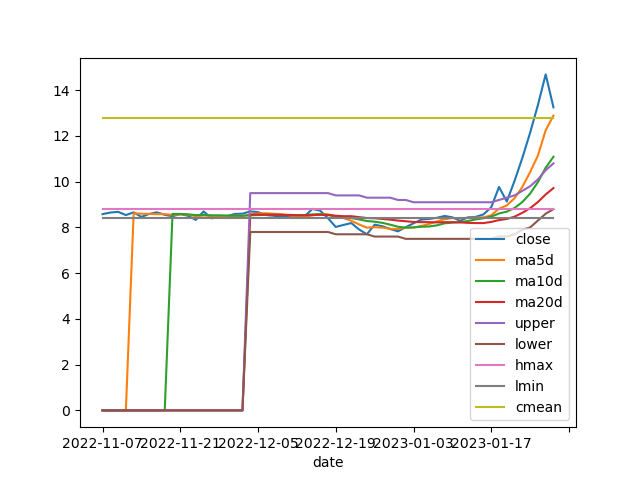

In [139]:
code
tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# cname = tdd.get_sina_data_code(code)
# plt.title(
#     stock_code + " | " + cname + " | " + str(quotes.index[-1])[: 10],
#     fontsize=14)
tdf.loc[:, ["close", "ma5d", "ma10d", "ma20d",
            "upper", "lower", "hmax", 'lmin', 'cmean']].plot()

In [55]:
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
date,,,,,,,,,
2023-02-02,1.1,1.1,1.1,1.1,1.0,1.0,1.1,1.1,1.1


In [63]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
date,,,,,,,,,
2023-02-02,10.0,10.0,10.0,10.0,10.0,-6.6,10.0,3.6,1.3
